<h1> DBSCAN </h1>
<p> Density Based Spatial Clustering of Aplication with Noise </p>
<p> Debe encontrar un minimo de vecinos para encontrar la densidad, requiere dos parametros: </p>
<li> EPS - Epsilon (Radio de los puntos.)
<li> MinPts - Minimo de puntos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
X, y, c = make_blobs(500, cluster_std = 0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1':X[:,0],
        'x2':X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1':c[:,0],
        'x2':c[:,1],
    }
)

In [3]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1':X_m[:,0],
        'x2':X_m[:,1]
    })

<h3> Visualización de datos. </h3>

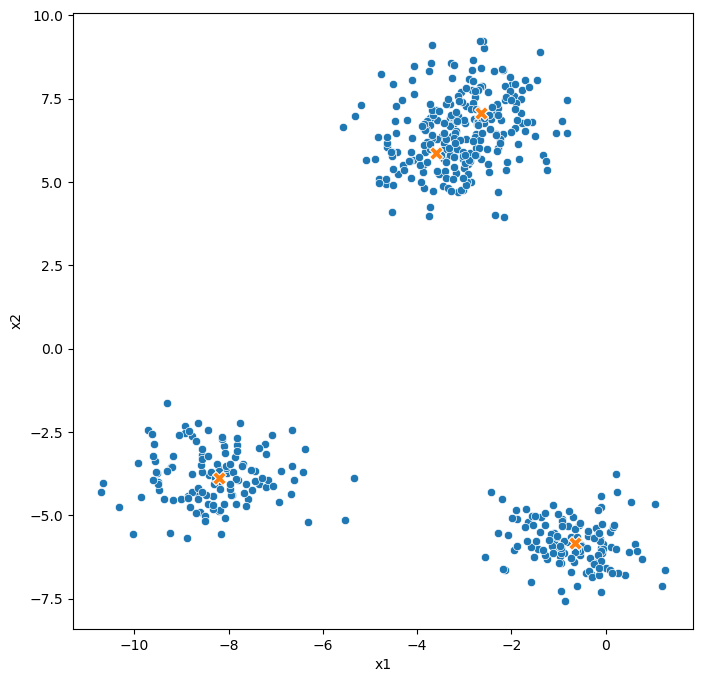

In [4]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(data=df_blobs, x= 'x1', y='x2')
sns.scatterplot(data=df_centers, x= 'x1', y='x2', marker='X', s = 100)
plt.plot()
plt.show()

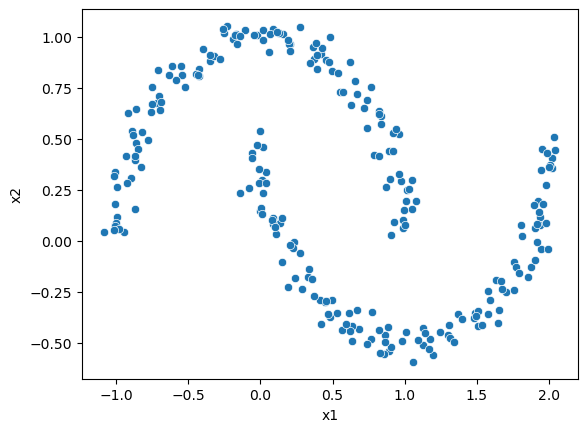

In [5]:
sns.scatterplot(data = df_moons, x= 'x1', y='x2')
plt.show()

<h3> Implemenando DBSCAN </h3>

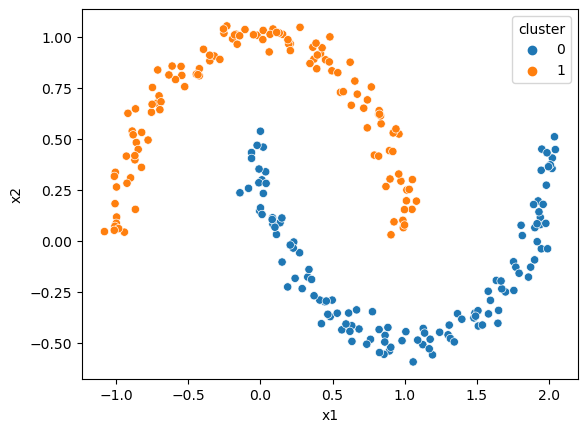

In [6]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

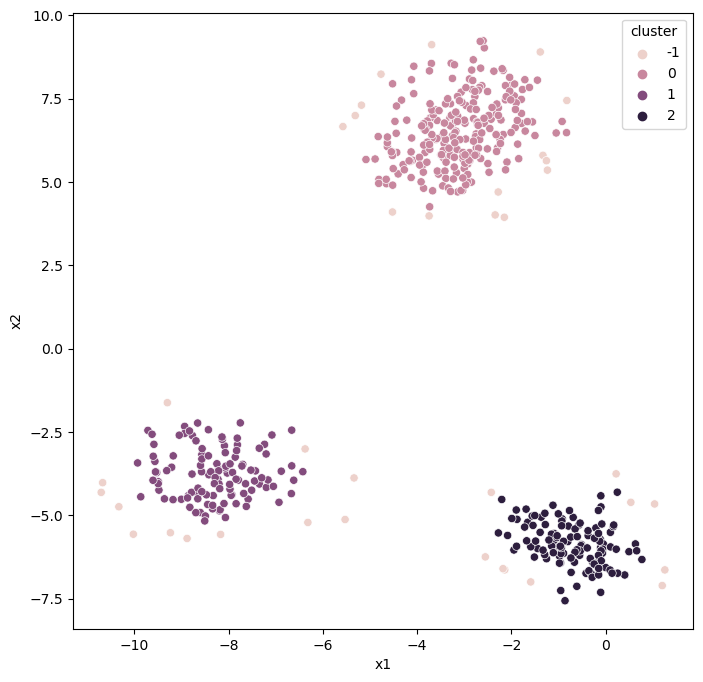

In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize = (8, 8))
sns.scatterplot(data = df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()
# Los que se clasifican -1 son ruido. 

<h3> Encontrar híper-parámetros </h3>

In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
neighbors = NearestNeighbors(n_neighbors = 3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

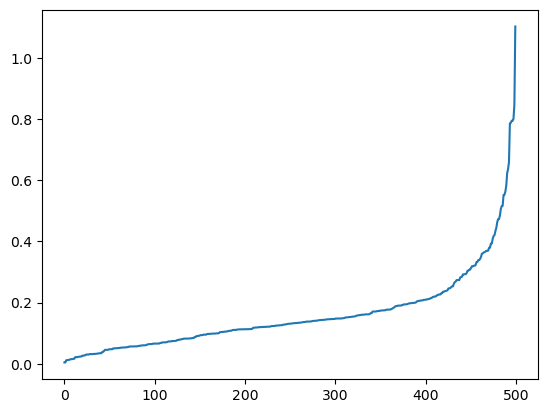

In [10]:
# Tecnica de la rodilla.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [11]:
# Iteración sobre el eps y el min de vec validos. Se itera sobre los valores que estan en la rodilla. 
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2, 10)

In [12]:
eps_values

array([0.25, 0.35, 0.45, 0.55, 0.65, 0.75])

In [13]:
min_samples

array([2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#Convertir los parametros en una matriz.
from itertools import product

In [18]:
dbscan_paramns = list(product(eps_values, min_samples))
sil_scores = []

for p in dbscan_paramns:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scores.append(silhouette_score(X, y_pred))

In [19]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps', 'Min_Samples'])

In [24]:
df_paramns_tunning.head(5)

,Eps,Min_Samples,sil_scores
0,0.25,2,-0.104902
1,0.25,3,-0.104178
2,0.25,4,-0.126748
3,0.25,5,-0.121250
4,0.25,6,-0.196417


In [21]:
# Se agrega la columna con el calculo del score de la silueta.
df_paramns_tunning['sil_scores'] = sil_scores 

In [25]:
df_paramns_tunning.head(5)

,Eps,Min_Samples,sil_scores
0,0.25,2,-0.104902
1,0.25,3,-0.104178
2,0.25,4,-0.126748
3,0.25,5,-0.121250
4,0.25,6,-0.196417


In [26]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='Min_Samples', columns='Eps')
pivot_data

Eps,0.25,0.35,0.45,0.55,0.65,0.75
Min_Samples,,,,,,
2,-0.104902,-0.107826,0.077969,0.198836,0.471931,0.776502
3,-0.104178,-0.052538,0.250175,0.380444,0.531059,0.776502
4,-0.126748,0.407193,0.279014,0.724131,0.756840,0.767082
5,-0.121250,0.403737,0.501773,0.697140,0.756951,0.765719
6,-0.196417,0.387706,0.596451,0.693212,0.731872,0.765719
7,-0.298469,0.131258,0.587266,0.655180,0.727424,0.765749
8,-0.471851,0.054915,0.469140,0.649254,0.719258,0.756855
9,-0.509919,-0.023635,0.466599,0.638832,0.706650,0.736398


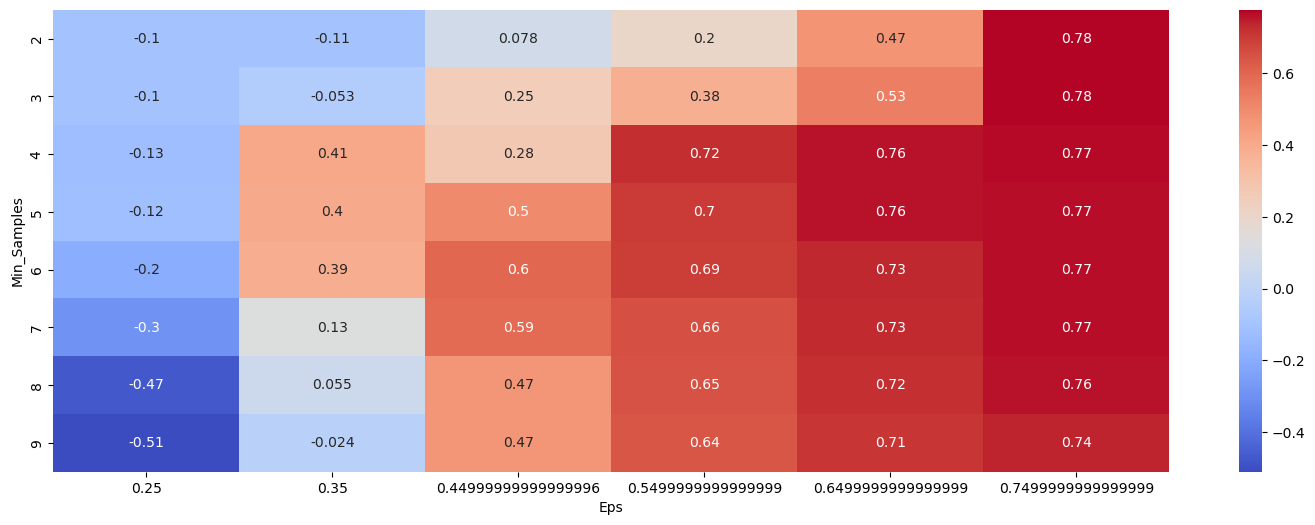

In [27]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()